In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import datasets

In [2]:
iris=datasets.load_iris()

In [3]:
x=iris.data

In [4]:
y=iris.target

In [5]:
type(x)

numpy.ndarray

In [6]:
x=pd.DataFrame(x)

In [7]:
type(x)

pandas.core.frame.DataFrame

In [8]:
x.shape

(150, 4)

In [9]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [25]:
x.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
x.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
(X_train, X_test, y_train, y_test) = train_test_split(x, y, train_size=0.7, random_state=1)

In [11]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.9555555555555556

In [12]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [13]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [14]:
y_pred = clf_gini.predict(X_test)
print ("Accuracy is :", accuracy_score(y_test,y_pred)*100)

Accuracy is : 95.55555555555556


In [15]:
results = confusion_matrix(y_test, y_pred) 
print ('Confusion Matrix :')
print(results)

Confusion Matrix :
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


In [16]:
y_pred = clf_entropy.predict(X_test)
print ("Accuracy is :", accuracy_score(y_test,y_pred)*100)

Accuracy is : 95.55555555555556


In [17]:
results = confusion_matrix(y_test, y_pred) 
print ('Confusion Matrix :')
print(results)

Confusion Matrix :
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


In [19]:
features=clf_entropy.feature_importances_
imp_features=features.argsort()[::-1][:5]
print(imp_features)
#a=X_train2.columns[imp_features]
#b=list(a)

[2 3 0 1]


[Text(313.875, 475.65000000000003, 'X[2] <= 2.6\nentropy = 1.582\nsamples = 105\nvalue = [36, 32, 37]'),
 Text(209.25, 339.75, 'entropy = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(418.5, 339.75, 'X[3] <= 1.65\nentropy = 0.996\nsamples = 69\nvalue = [0, 32, 37]'),
 Text(209.25, 203.85000000000002, 'X[2] <= 4.85\nentropy = 0.431\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(104.625, 67.94999999999999, 'entropy = 0.0\nsamples = 28\nvalue = [0, 28, 0]'),
 Text(313.875, 67.94999999999999, 'entropy = 1.0\nsamples = 6\nvalue = [0, 3, 3]'),
 Text(627.75, 203.85000000000002, 'X[0] <= 5.95\nentropy = 0.187\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(523.125, 67.94999999999999, 'entropy = 0.592\nsamples = 7\nvalue = [0, 1, 6]'),
 Text(732.375, 67.94999999999999, 'entropy = 0.0\nsamples = 28\nvalue = [0, 0, 28]')]

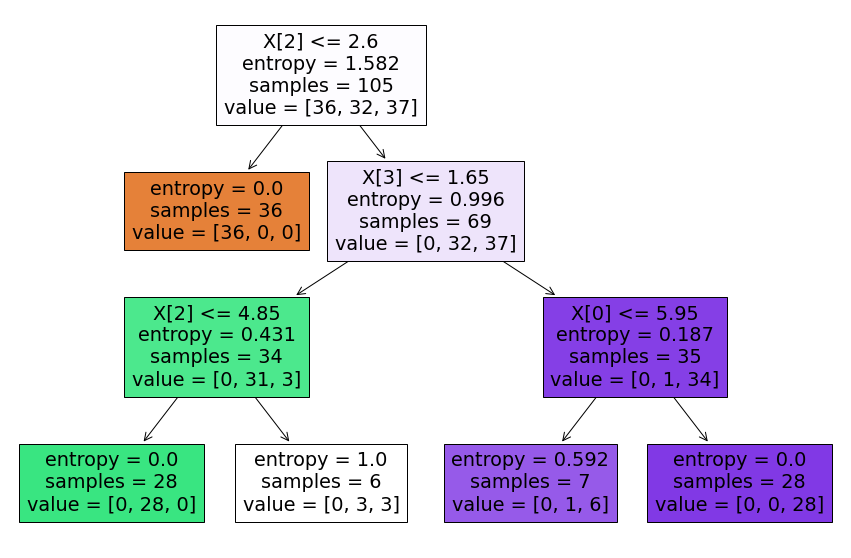

In [26]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf_entropy,filled=True)